# Tugas Praktikum

Dataset Medical Cost Personal Insurance berisi 1.338 data pasien yang menggambarkan faktor-faktor yang mempengaruhi biaya medis personal. Setiap baris mewakili seorang pasien.

# Import Libraries & Load Dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Upload dataset
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Visualisasi Awal Data

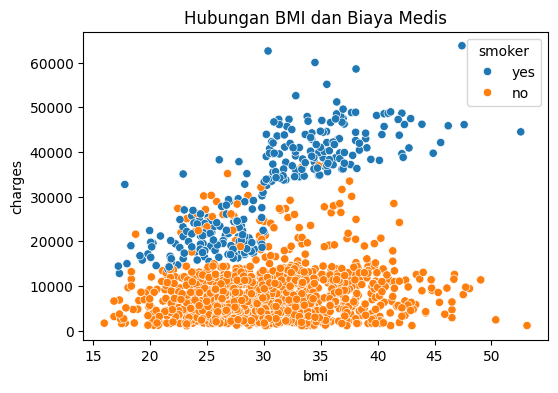

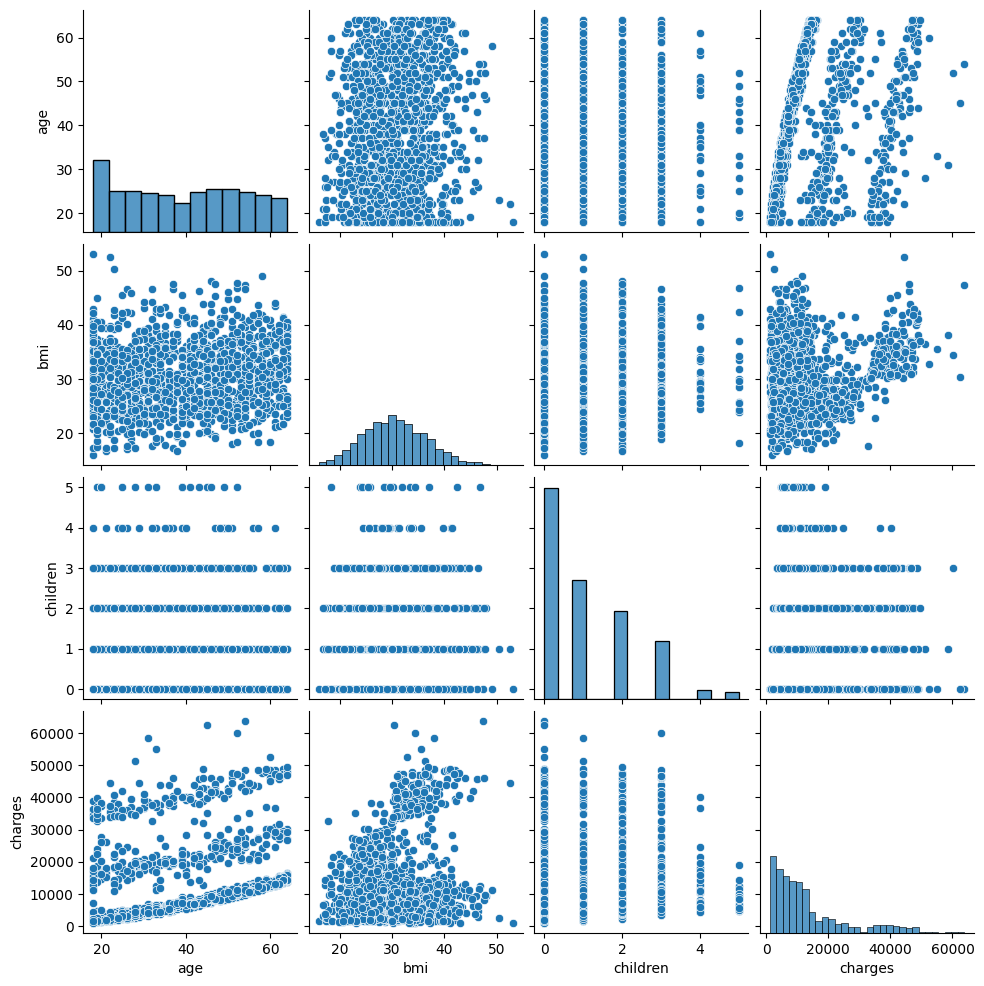

In [41]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.title('Hubungan BMI dan Biaya Medis')
plt.show()

sns.pairplot(df[['age','bmi','children','charges']])
plt.show()

# Encoding & Split Data

In [43]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# Variabel bebas dan target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluasi Model

In [46]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared :", r2)
print("MSE       :", mse)
print("MAE       :", mae)

R-squared : 0.7835929767120722
MSE       : 33596915.851361476
MAE       : 4181.194473753651


# Visualisasi Hasil Prediksi vs Aktual

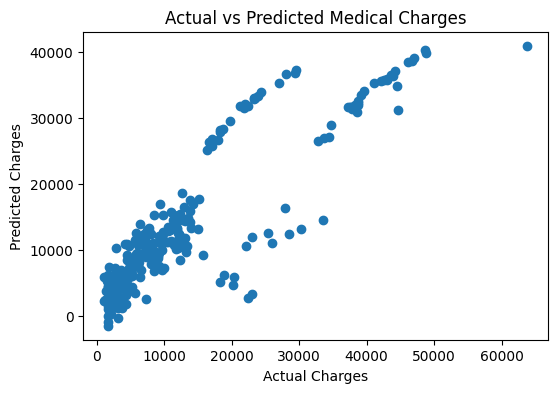

In [47]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()